# CHECLabPy Tutorial

This notebook serves as a tutorial for calibrating and analysing CHEC data using the TARGET libraries and the CHECLabPy Python package.

## Setup

Prepare your machine and environment by following the instructions at: https://forge.in2p3.fr/projects/gct/wiki/Installing_CHEC_Software

Check the installation was successful by running these lines:

In [5]:
import target_driver
import target_io
import target_calib
from os import environ
assert 'TC_CONFIG_PATH' in environ
assert 'TARGETCALIBPATH' in environ

## Files

To run this tutorial you must download a reference dataset (using the username and password Rich has sent around in emails/Slack)

In [2]:
username = '***'
pw = '***'
ped_url = 'https://www.mpi-hd.mpg.de/personalhomes/white/checs/data/d0000_ReferenceData/Run17438_r0.tio'
run_url = 'https://www.mpi-hd.mpg.de/personalhomes/white/checs/data/d0000_ReferenceData/Run17473_r0.tio'
mon_url = ''

In [ ]:
!mkdir refdata
!wget --user $username --password $pw -P refdata $ped_url
!wget --user $username --password $pw -P refdata $run_url
!wget --user $username --password $pw -P refdata $mon_url

## Calibration

You have just downloaded the raw (R0) data files for a pedestal run and a ~50 p.e. illumination run. If you only had access to the R0 files, and not the \_ped.tcal file (Pedestal file) R1 (calibrated waveforms) or DL1 (reduced files), then this is the point you would have to start at.

For this section you need TargetDriver, TargetIO and TargetCalib installed.

### Pedestal Generation

This script produces the pedestal file (_ped.tcal) from an R0 run.

In [4]:
!$TARGETCALIBPATH/generate_ped -h


Purpose: Generate the pedestal file from a pedestal run.
Usage:   /Users/Jason/Software/TargetCalib/install/generate_ped [-option] [argument]
option:  -h  Show help information
         -i  Raw data input file name
         -o  Pedestal output file name (optional)
         -c  Compress the output pedestal file? Default = false (optional)
         -n  Number events to process (optional)
example: /Users/Jason/Software/TargetCalib/install/generate_ped -i /path/Run00001_r0.tio


In [ ]:
!$TARGETCALIBPATH/generate_ped -i refdata/Run17438_r0.tio


[main] Input file: refdata/Run17438_r0.tio
[main] Output file: refdata/Run17438_ped.tcal
[main] Compress: 0
[main] Check for outliers: 0
[main] Outlier # std: 20
[PedestalGenerator] Opening Event File: refdata/Run17438_r0.tio
[PedestalGenerator] EVENT FILE CONTENTS: 
	 NModules: 32
	 ActiveModuleSlots: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
	 NCells: 4096
	 NBlockSamples: 32
	 NBlocks: 128
	 SkipSamples: 0
	 SkipEndSamples: 0
	 SkipEvents: 2
	 SkipEndEvents: 1
	 NEvents: 20152
	 NSamples: 128
[PedestalGenerator] Creating PedMaker
Thu Feb 22 11:16:16 2018 [CTA::TargetCalib::PedestalMaker::Clear] DEBUG :Allocating pedestal memory... be patient
Thu Feb 22 11:16:16 2018 [CTA::TargetCalib::PedestalMaker::Clear] DEBUG :Memory Allocated
[PedestalGenerator] Looping over 20152 events to determine pedestals


### Applying Calibration

This script applies the calibration files (pedestal and transfer function) to an R0 file to produce a R1 file containing calibrated waveforms. The "-x" argument instructs the executable to find the correct TFs for each module by looking at the module serial numbers in the header of the R0 file, and find the appropriate TF files inside $TC_CONFIG_PATH

In [1]:
!$TARGETCALIBPATH/apply_calibration -h

Purpose: Create a new tio file containing calibrated waveforms.
         This version takes a TF file to calibrate all modules.
Usage:   /Users/Jason/Software/TargetCalib/install/apply_calibration [-option] [argument]
option:  -h  Show help information
         -i  Raw data input file name
         -p  Pedestal file name (required)
         -t  Transfer function file name (optional)
         -x  Automatically get transfer function file from header (flag)
         -a  ADC2PE file name (optional)
         -f  Flat Field file name (optional)
         -n  Number events to process (optional)


In [2]:
!$TARGETCALIBPATH/apply_calibration -i refdata/Run17473_r0.tio -p refdata/Run17438_ped.tcal -x

[main] Input file: refdata/Run17473_r0.tio
[main] Output file: refdata/Run17473_r1.tio
[main] Pedestal file: refdata/Run17438_ped.tcal
[CalibrationApplier] Opening R0 Event File: refdata/Run17473_r0.tio
[CalibrationApplier] EVENT FILE CONTENTS: 
	 NModules: 32
	 ActiveModuleSlots: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
	 NCells: 4096
	 NBlockSamples: 32
	 NBlocks: 128
	 NEvents: 1129
	 NSamples: 128
	 SkipSamples: 0
[CalibrationApplier] Creating R1 Writer
[CalibrationApplier] Creating Calibrator
[CalibrationApplier] TF file for each module:
	TM: 0 SN: 51 PATH: /Users/Jason/Software/CHECDevelopment/CHECS/Operation/SN0051_tf.tcal
	TM: 1 SN: 76 PATH: /Users/Jason/Software/CHECDevelopment/CHECS/Operation/SN0076_tf.tcal
	TM: 2 SN: 31 PATH: /Users/Jason/Software/CHECDevelopment/CHECS/Operation/SN0031_tf.tcal
	TM: 3 SN: 28 PATH: /Users/Jason/Software/CHECDevelopment/CHECS/Operation/SN0028_tf.tcal
	TM: 4 SN: 60 PATH: /Users/Jason/Software/CHECDev

Thu Feb 22 11:16:16 2018 [CTA::TargetCalib::Calibrator::LoadTf] DEBUG :|...ation/SN0072_tf.tcal|1  |4096 |0       |-375   |3648   |183   
Thu Feb 22 11:16:16 2018 [CTA::TargetCalib::Calibrator::LoadTf] DEBUG :|...ation/SN0024_tf.tcal|1  |4096 |0       |-375   |3648   |183   
Thu Feb 22 11:16:16 2018 [CTA::TargetCalib::Calibrator::LoadTf] DEBUG :|...ation/SN0074_tf.tcal|1  |4096 |0       |-350   |3598   |180   
Thu Feb 22 11:16:16 2018 [CTA::TargetCalib::Calibrator::LoadTf] DEBUG :|...ation/SN0056_tf.tcal|1  |4096 |0       |-350   |3648   |182   
[CalibrationApplier] Offset = 370, Scale = 22.8
[CalibrationApplier] Looping over 1129 events to perform R1 calibration
[======================================================================] 100 %
Time to process events: 27.4 seconds (41.2 Hz)
[CalibrationApplier] Adding calibration keys to writer header
EventFile::Close()
EventFile::Close()
EventFile::Close()
EventFile::Close()


## Data Reduction

Once you have the R1 (calibrated waveforms) file, you can now extract charge and other parameters from the waveforms. This is where CHECLabPy comes into play. The extract_dl1.py script allows you to specify a reduction method to produce a HDF5 containing a table where each column is parameters extracted per event and pixel.

If you already have the R1 calibrated waveform files, then you can start the tutorial from this step.

In [3]:
!python extract_dl1.py -h

usage: extract_dl1.py [-h] -f INPUT_PATH [-m MONITOR] [-o OUTPUT_PATH] [-n MAX_EVENTS] [-r {AverageWF,CrossCorrelation}] [-c CONFIGURATION] [-p]

Reduce a *_r1.tio file into a *_dl1.hdf5 file containing various parameters extracted from the waveforms

optional arguments:
  -h, --help            show this help message and exit
  -f INPUT_PATH, --file INPUT_PATH
                        path to the TIO r1 run file (default: None)
  -m MONITOR, --monitor MONITOR
                        path to the monitor file (OPTIONAL) (default: None)
  -o OUTPUT_PATH, --output OUTPUT_PATH
                        path to store the output HDF5 dl1 file (OPTIONAL, will be automatically set if not specified) (default: None)
  -n MAX_EVENTS, --maxevents MAX_EVENTS
                        Number of events to process (default: None)
  -r {AverageWF,CrossCorrelation}, --reducer {AverageWF,CrossCorrelation}
                        WaveformReducer to use (default: AverageWF)
  -c CONFIGURATION, --config CONFIGURA

In [4]:
!python extract_dl1.py -f refdata/Run17473_r1.tio

[TargetIOEventReader] Path: refdata/Run17473_r1.tio
[TargetIOEventReader] IsR1: 1
[TargetIOEventReader] NModules: 32
[TargetIOEventReader] ActiveModuleSlots: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
[TargetIOEventReader] NPixels: 2048
[TargetIOEventReader] NCells: 4096
[TargetIOEventReader] SkipSamples: 0
[TargetIOEventReader] SkipEndSamples: 0
[TargetIOEventReader] SkipEvents: 2
[TargetIOEventReader] SkipEndEvents: 1
[TargetIOEventReader] NEvents: 1126
[TargetIOEventReader] NSamples: 128
Creating initial baseline from first 50 events
Baseline Created
Creating HDF5 file: refdata/Run17473_dl1.h5
Processing events: 100%|████████████████████| 1126/1126 [00:31<00:00, 35.45it/s]
Saving data metadata to HDF5 file
EventFile::Close()
EventFile::Close()


## Analysis

You now have the data reduced to the \_dl1.h5 level, using the data reduction method you wanted. The following sections will show you how to open these files and perform analysis with them.

### Introduction

The .h5 extension is used by HDF5 files https://support.hdfgroup.org/HDF5/whatishdf5.html.

Inside the HDF5 files are HDFStores, which are the format pandas DataFrames are stored inside HDF5 files. You can read about HDFStores here: https://pandas.pydata.org/pandas-docs/stable/io.html#hdf5-pytables.

Pandas DataFrames are a tabular data structure widely used by data scientists for Python analysis: https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe. They allow easy querying, sorting, grouping, and processing of data.

### Reading DL1 Files

There are two main contents to the DL1 file: the table, and the metadata.

In [1]:
from CHECLabPy.core.io import DL1Reader
reader = DL1Reader("refdata/Run17473_dl1.h5")

Opening HDF5 file: refdata/Run17473_dl1.h5


In [8]:
reader.metadata

{'configuration': '',
 'end_time': Timestamp('2018-02-09 17:07:46.827854686'),
 'input_path': 'refdata/Run17473_r1.tio',
 'n_bytes': 202932224,
 'n_cells': 4096,
 'n_events': 1126,
 'n_pixels': 2048,
 'n_samples': 128,
 'reducer': 'AverageWF',
 'start_time': Timestamp('2018-02-09 17:07:44.577832258'),
 'version': '0.0.0'}

In [9]:
reader.load_entire_table()

Loading entire DataFrame from HDF5 file


,amp_pulse,baseline_end_mean,baseline_end_rms,baseline_start_mean,baseline_start_rms,baseline_subtracted,charge,first_cell_id,fwhm,iev,pixel,t_cpu,t_event,t_pulse,t_tack,tr,waveform_mean,waveform_rms,trbaseline_start_mean
0,261.655121,-2.951096,5.770358,-0.284430,1.310045,0.424793,1508.224609,1424,7.370709,0,0,2018-02-09 17:07:44.577832258,60,60.649921,17944750536260,4.690200,10.561376,57.727650,0.0
1,265.466614,-3.243040,5.611376,-0.050052,0.947097,0.221119,1596.739990,1424,7.362029,0,1,2018-02-09 17:07:44.577832258,60,60.400902,17944750536260,4.597551,10.230167,58.091755,0.0
2,229.731720,-3.504771,5.001210,-1.219680,0.895132,0.489431,1340.602295,1424,7.131708,0,2,2018-02-09 17:07:44.577832258,60,60.598240,17944750536260,4.770278,7.998451,49.254673,0.0
3,198.647232,-2.601374,5.073231,0.161786,0.959406,0.193488,1173.934692,1424,8.291875,0,3,2018-02-09 17:07:44.577832258,60,60.840908,17944750536260,5.264879,8.088116,45.916924,0.0
4,233.101318,-3.084047,2.136533,-0.820891,1.466703,0.167392,1382.345215,1424,7.813689,0,4,2018-02-09 17:07:44.577832258,60,60.640892,17944750536260,5.173340,9.080495,51.448963,0.0
5,213.735764,-2.111623,3.716585,-0.708113,2.524830,0.146723,1233.519287,1424,7.793462,0,5,2018-02-09 17:07:44.577832258,60,60.801369,17944750536260,5.081110,8.612541,47.251648,0.0
6,209.118042,-2.849942,5.130963,0.494351,1.226335,0.378467,1199.516235,1424,8.091750,0,6,2018-02-09 17:07:44.577832258,60,60.838028,17944750536260,4.991615,8.425685,47.711777,0.0
7,204.162567,-1.934206,3.050223,0.752192,1.919728,-0.098672,1203.070190,1424,7.851676,0,7,2018-02-09 17:07:44.577832258,60,60.626263,17944750536260,4.950886,7.823466,45.393600,0.0
8,234.758987,-2.747639,6.244452,-0.414309,1.914385,0.372655,1386.141724,1424,8.321688,0,8,2018-02-09 17:07:44.577832258,60,60.748135,17944750536260,5.030062,9.351522,55.153355,0.0
9,206.411102,-2.646164,6.658001,1.340678,1.545080,0.106701,1197.962280,1424,8.232627,0,9,2018-02-09 17:07:44.577832258,60,61.094444,17944750536260,4.640755,8.222190,49.457535,0.0


As you can see, the structure of the DataFrame is very intuitive, with each row reprenting a new event+pixel. Some extra useful information about the DataFrame can be obtained:

In [12]:
print("n_bytes = ", reader.n_bytes * 1E-9, "GB")
print("n_rows = ", reader.n_rows)
print("columns = ", reader.columns)

n_bytes =  0.202932224 GB
n_rows =  2306048
columns =  ['amp_pulse', 'baseline_end_mean', 'baseline_end_rms', 'baseline_start_mean', 'baseline_start_rms', 'baseline_subtracted', 'charge', 'first_cell_id', 'fwhm', 'iev', 'pixel', 't_cpu', 't_event', 't_pulse', 't_tack', 'tr', 'waveform_mean', 'waveform_rms', 'trbaseline_start_mean']


The `reader.load_entire_table()` loads the entire table into memory. This may be a problem for very large runs, therefore there are a variety of methods for only loading a portion of the table:

In [31]:
# Load a single column from table
charge = reader.select_column('charge')
charge = charge.values # Convert from Pandas Series to numpy array
charge

array([ 1508.22460938,  1596.73999023,  1340.60229492, ...,  1446.60095215,
         999.4442749 ,  1299.75744629], dtype=float32)

In [17]:
# Load a single column for rows 0 to 100
charge = reader.select_column('charge', start=0, stop=100)
charge = charge.values # Convert from Pandas Series to numpy array
charge

array([ 1508.22460938,  1596.73999023,  1340.60229492,  1173.93469238,
        1382.34521484,  1233.51928711,  1199.51623535,  1203.07019043,
        1386.14172363,  1197.96228027,  1553.98950195,  1951.21716309,
        1394.0859375 ,  1135.3873291 ,  1652.86669922,  1720.18774414,
        1062.53735352,  1595.1505127 ,  1157.57202148,  1620.77587891,
        1714.96240234,  1254.62683105,  1127.99658203,   959.3815918 ,
        1176.15661621,   988.1539917 ,   919.27850342,  1567.31591797,
        1246.32080078,  1060.18823242,   968.24700928,  1628.38122559,
        1165.6763916 ,  1200.2869873 ,  1191.36450195,  1375.87365723,
        1328.66894531,  1639.89660645,    33.28068161,  1337.49645996,
        1444.95446777,  1305.92333984,  1938.64135742,  1712.70654297,
         846.05792236,  1585.00769043,   972.27331543,   892.17498779,
        1271.05310059,  1520.10095215,  1817.34619141,  1241.65185547,
        1423.10925293,  2244.97949219,  1210.47583008,  1263.09606934,
      

In [24]:
# Load multiple columns with the select_columns method
pixel, charge = reader.select_columns(['pixel', 'charge'])
charge = charge.values # Convert from Pandas Series to numpy array
pixel = pixel.values # Convert from Pandas Series to numpy array
print('charge = ', charge)
print('pixel = ', pixel)

charge =  [ 1508.22460938  1596.73999023  1340.60229492 ...,  1446.60095215
   999.4442749   1299.75744629]
pixel =  [   0    1    2 ..., 2045 2046 2047]


In [28]:
# Loop through the rows
for row in reader.iterate_over_rows():
    break
    
row

,amp_pulse,baseline_end_mean,baseline_end_rms,baseline_start_mean,baseline_start_rms,baseline_subtracted,charge,first_cell_id,fwhm,iev,pixel,t_cpu,t_event,t_pulse,t_tack,tr,waveform_mean,waveform_rms,trbaseline_start_mean
0,261.655121,-2.951096,5.770358,-0.28443,1.310045,0.424793,1508.224609,1424,7.370709,0,0,2018-02-09 17:07:44.577832258,60,60.649921,17944750536260,4.6902,10.561376,57.72765,0.0


In [27]:
# Loop through the events
for df in reader.iterate_over_events():
    break
    
df

,amp_pulse,baseline_end_mean,baseline_end_rms,baseline_start_mean,baseline_start_rms,baseline_subtracted,charge,first_cell_id,fwhm,iev,pixel,t_cpu,t_event,t_pulse,t_tack,tr,waveform_mean,waveform_rms,trbaseline_start_mean
0,261.655121,-2.951096,5.770358,-0.284430,1.310045,0.424793,1508.224609,1424,7.370709,0,0,2018-02-09 17:07:44.577832258,60,60.649921,17944750536260,4.690200,10.561376,57.727650,0.0
1,265.466614,-3.243040,5.611376,-0.050052,0.947097,0.221119,1596.739990,1424,7.362029,0,1,2018-02-09 17:07:44.577832258,60,60.400902,17944750536260,4.597551,10.230167,58.091755,0.0
2,229.731720,-3.504771,5.001210,-1.219680,0.895132,0.489431,1340.602295,1424,7.131708,0,2,2018-02-09 17:07:44.577832258,60,60.598240,17944750536260,4.770278,7.998451,49.254673,0.0
3,198.647232,-2.601374,5.073231,0.161786,0.959406,0.193488,1173.934692,1424,8.291875,0,3,2018-02-09 17:07:44.577832258,60,60.840908,17944750536260,5.264879,8.088116,45.916924,0.0
4,233.101318,-3.084047,2.136533,-0.820891,1.466703,0.167392,1382.345215,1424,7.813689,0,4,2018-02-09 17:07:44.577832258,60,60.640892,17944750536260,5.173340,9.080495,51.448963,0.0
5,213.735764,-2.111623,3.716585,-0.708113,2.524830,0.146723,1233.519287,1424,7.793462,0,5,2018-02-09 17:07:44.577832258,60,60.801369,17944750536260,5.081110,8.612541,47.251648,0.0
6,209.118042,-2.849942,5.130963,0.494351,1.226335,0.378467,1199.516235,1424,8.091750,0,6,2018-02-09 17:07:44.577832258,60,60.838028,17944750536260,4.991615,8.425685,47.711777,0.0
7,204.162567,-1.934206,3.050223,0.752192,1.919728,-0.098672,1203.070190,1424,7.851676,0,7,2018-02-09 17:07:44.577832258,60,60.626263,17944750536260,4.950886,7.823466,45.393600,0.0
8,234.758987,-2.747639,6.244452,-0.414309,1.914385,0.372655,1386.141724,1424,8.321688,0,8,2018-02-09 17:07:44.577832258,60,60.748135,17944750536260,5.030062,9.351522,55.153355,0.0
9,206.411102,-2.646164,6.658001,1.340678,1.545080,0.106701,1197.962280,1424,8.232627,0,9,2018-02-09 17:07:44.577832258,60,61.094444,17944750536260,4.640755,8.222190,49.457535,0.0


In [30]:
# Loop through chunks
for df in reader.iterate_over_chunks(chunksize=4000):
    break
    
df

,amp_pulse,baseline_end_mean,baseline_end_rms,baseline_start_mean,baseline_start_rms,baseline_subtracted,charge,first_cell_id,fwhm,iev,pixel,t_cpu,t_event,t_pulse,t_tack,tr,waveform_mean,waveform_rms,trbaseline_start_mean
0,261.655121,-2.951096,5.770358,-0.284430,1.310045,0.424793,1508.224609,1424,7.370709,0,0,2018-02-09 17:07:44.577832258,60,60.649921,17944750536260,4.690200,10.561376,57.727650,0.0
1,265.466614,-3.243040,5.611376,-0.050052,0.947097,0.221119,1596.739990,1424,7.362029,0,1,2018-02-09 17:07:44.577832258,60,60.400902,17944750536260,4.597551,10.230167,58.091755,0.0
2,229.731720,-3.504771,5.001210,-1.219680,0.895132,0.489431,1340.602295,1424,7.131708,0,2,2018-02-09 17:07:44.577832258,60,60.598240,17944750536260,4.770278,7.998451,49.254673,0.0
3,198.647232,-2.601374,5.073231,0.161786,0.959406,0.193488,1173.934692,1424,8.291875,0,3,2018-02-09 17:07:44.577832258,60,60.840908,17944750536260,5.264879,8.088116,45.916924,0.0
4,233.101318,-3.084047,2.136533,-0.820891,1.466703,0.167392,1382.345215,1424,7.813689,0,4,2018-02-09 17:07:44.577832258,60,60.640892,17944750536260,5.173340,9.080495,51.448963,0.0
5,213.735764,-2.111623,3.716585,-0.708113,2.524830,0.146723,1233.519287,1424,7.793462,0,5,2018-02-09 17:07:44.577832258,60,60.801369,17944750536260,5.081110,8.612541,47.251648,0.0
6,209.118042,-2.849942,5.130963,0.494351,1.226335,0.378467,1199.516235,1424,8.091750,0,6,2018-02-09 17:07:44.577832258,60,60.838028,17944750536260,4.991615,8.425685,47.711777,0.0
7,204.162567,-1.934206,3.050223,0.752192,1.919728,-0.098672,1203.070190,1424,7.851676,0,7,2018-02-09 17:07:44.577832258,60,60.626263,17944750536260,4.950886,7.823466,45.393600,0.0
8,234.758987,-2.747639,6.244452,-0.414309,1.914385,0.372655,1386.141724,1424,8.321688,0,8,2018-02-09 17:07:44.577832258,60,60.748135,17944750536260,5.030062,9.351522,55.153355,0.0
9,206.411102,-2.646164,6.658001,1.340678,1.545080,0.106701,1197.962280,1424,8.232627,0,9,2018-02-09 17:07:44.577832258,60,61.094444,17944750536260,4.640755,8.222190,49.457535,0.0


Using the iterate methods, you could process a portion of the table at a time, and consolidate the results at the end, avoiding the need to load the entire table in memory.

### Reading R0/R1 data

If you instead wanted to do some very specific analysis of the waveforms themselves, that does not fit in the reduction scheme, CHECLabPy contains some classes that simplify the reading of .tio files in Python:

In [46]:
from CHECLabPy.core.io import ReaderR0, ReaderR1
reader_r0 = ReaderR0("refdata/Run17473_r0.tio")
reader_r1 = ReaderR1("refdata/Run17473_r1.tio")

print("n_events = ", reader_r1.n_events)

# Get a particular event
event = reader_r1[20] # waveform array of shape (n_pixels, n_samples)
print("Event wf: ", event)
print("Event shape: ", event.shape)

# Get additional info (reader is still at location of last event)
print("Event index: ", reader_r1.index)
print("Event first_cell_ids (for each channel): ", reader_r1.first_cell_ids)

# Loop over events in file
for event in reader_r1:
    pass

n_events =  1126
Event wf:  [[-0.21929932  0.78948975  0.57019043 ..., -3.46490479 -1.84210205
  -0.78945923]
 [-0.26315308 -1.35964966 -1.22805786 ..., -2.01751709 -1.35964966
   0.43859863]
 [-1.22805786 -1.62280273 -0.43859863 ..., -1.57894897 -3.33331299
  -0.70175171]
 ..., 
 [-1.75436401 -2.10525513 -2.10525513 ..., -0.39471436  1.09649658
   0.70175171]
 [-0.70175171 -0.43859863  0.74563599 ..., -0.74560547 -1.5350647
   0.43859863]
 [-0.52630615 -0.83331299 -1.31576538 ..., -3.24560547 -1.09646606
  -3.02630615]]
Event shape:  (2048, 128)
Event index:  20
Event first_cell_ids (for each channel):  [4032 4032 4032 ..., 4032 4032 4032]


### Making plots with the data

Underlying each dataframe column is a numpy array, therefore all analysis tools in Python which use numpy arrays (the majority) can be utilised in your data analysis, especially matplotlib.

In [47]:
%matplotlib inline

Opening HDF5 file: refdata/Run17473_dl1.h5
1315.7244957


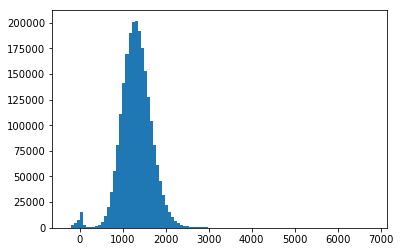

In [56]:
from matplotlib import pyplot as plt
from CHECLabPy.core.io import DL1Reader
reader = DL1Reader("refdata/Run17473_dl1.h5")
charge = reader.select_column('charge').values
hist, edges, _ = plt.hist(charge, bins=100)
between = (edges[1:] + edges[:-1]) / 2
max_ = between[hist.argmax()]
print(max_)

From this plot we can conclude the extracted charge in all pixels and events is a gaussian around ~1316 mV*ns, and there is a second distribution around zero containing dead pixels. If we were certain that this run was taken at 50 p.e. illumination, then this would suggest there are 26 mV*ns per p.e. (for this charge extractor). However, to make that conclusion properly we instead look at single p.e. measurements.

Using the Mapping class of TargetCalib we can also create camera images of the data.

Opening HDF5 file: refdata/Run17473_dl1.h5


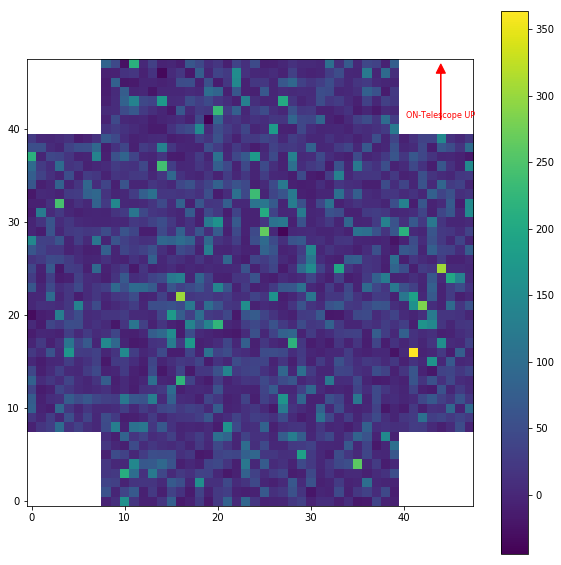

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from CHECLabPy.core.io import DL1Reader
reader = DL1Reader("refdata/Run17473_dl1.h5")
m = reader.mapping
charge = reader.select_column('charge').values
iev = reader.select_column('iev').values

charge = charge[iev == 10]

row = np.array(m.GetRowVector())
col = np.array(m.GetColumnVector())
nrows = row.max() + 1
ncols = col.max() + 1

image = np.ma.zeros((nrows, ncols))
image[row, col] = charge
image[0:8, 40:48] = np.ma.masked
image[0:8, 0:8] = np.ma.masked
image[40:48, 0:8] = np.ma.masked
image[40:48, 40:48] = np.ma.masked

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.imshow(image, origin='lower')
fig.colorbar(im)

axl = m.fOTUpCol_l
ayl = m.fOTUpRow_l
adx = m.fOTUpCol_u - axl
ady = m.fOTUpRow_u - ayl
ax.arrow(axl, ayl, adx, ady, head_width=1, head_length=1, fc='r', ec='r')
text = "ON-Telescope UP"
ax.text(axl, ayl, text, fontsize=8, color='r', ha='center', va='bottom')

plt.show()

Alternatively, you can use the CameraPlotter class inside CHECLabPy (which does the exact same as above):

Opening HDF5 file: refdata/Run17473_dl1.h5


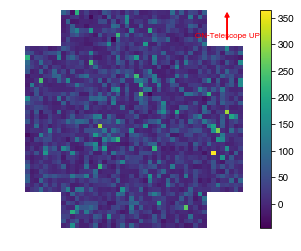

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from CHECLabPy.core.io import DL1Reader
from CHECLabPy.plotting.camera import CameraPlotter
reader = DL1Reader("refdata/Run17473_dl1.h5")
charge = reader.select_column('charge').values
iev = reader.select_column('iev').values

charge = charge[iev == 10]

camera = CameraPlotter(reader.mapping)
camera.plot(charge)
camera.annotate()

plt.show()

### Monitor Information

If you have a monitor file that accompanies your run file, then you can include it into the HDF5 file. It is saved as a seperate tables, where each row is a seperate "monitor_event" or module entry. Then a new column is added to the waveform data table called "monitor_index" which matches each event to its corresponding monitor row.

To include the monitor information in the HDF5 file then use the "-m" option of extract_dl1.py:

In [ ]:
!python extract_dl1.py -f refdata/Run17473_r1.tio -m refdata/Run17473.mon

To access the monitor table:

In [ ]:
from CHECLabPy.core.io import DL1Reader
reader = DL1Reader("refdata/Run17473_dl1.h5")
reader.monitor.load_entire_table()

The same methods that exist for the reader, also exist for the reader.monitor, they just access different tables:

In [ ]:
reader.monitor.columns

In [ ]:
from matplotlib import pyplot as plt
temp = reader.monitor.select_column("TM_T_SIPM")
plt.hist(temp, bins=100)

And to match between data and monitor you use the following method:

In [62]:
monitor_index = reader.select_column("monitor_index")
temp = reader.get_monitor_column(monitor_index, "TM_T_SIPM")

TypeError: get_monitor_column() missing 2 required positional arguments: 'monitor_index' and 'column'